# Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Reading Dataset

In [2]:
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
dataset.shape

(5110, 12)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
dataset.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
dataset.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# Handling Missing Data

In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
for col_name in dataset.columns:
    if dataset[col_name].isna().sum() != 0:
        imputer.fit(dataset[[col_name]])
        dataset[col_name] = imputer.transform(dataset[[col_name]])

# Exploratory data analysis

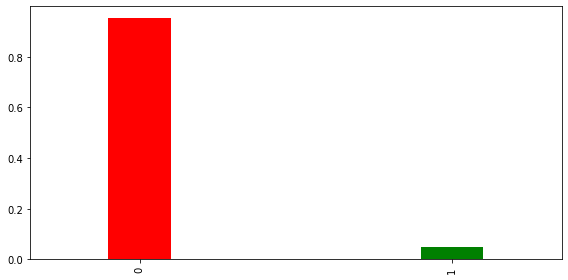

In [10]:
fig, axes = plt.subplots(figsize=(8,4))
dataset['stroke'].value_counts(normalize=True).plot.bar(width=0.2, color=('red', 'green'))

plt.tight_layout()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

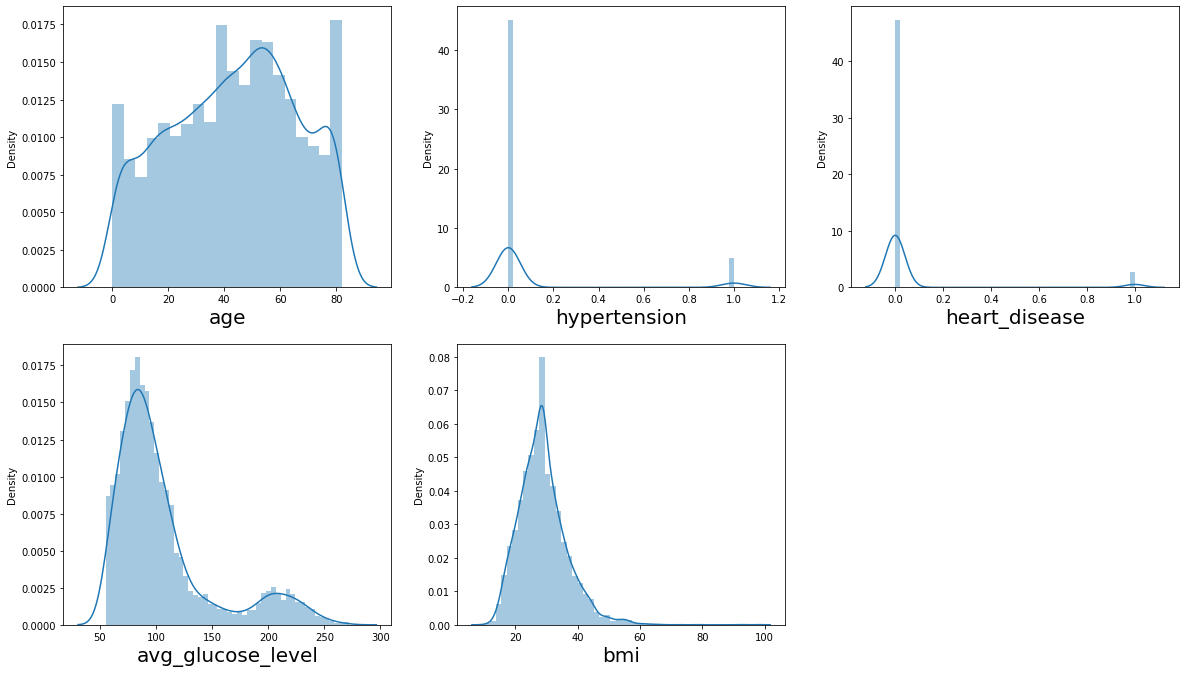

In [11]:
# distplot
cols = dataset[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
import seaborn as sns
plt.figure(figsize=(20, 30), facecolor='white')
plotnumber = 1

for column in cols:
    if plotnumber <= len(cols):
        ax = plt.subplot(5, 3, plotnumber)
        sns.distplot(cols[column])
        plt.xlabel(column, fontsize=20)
    plotnumber += 1
plt.show()        

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

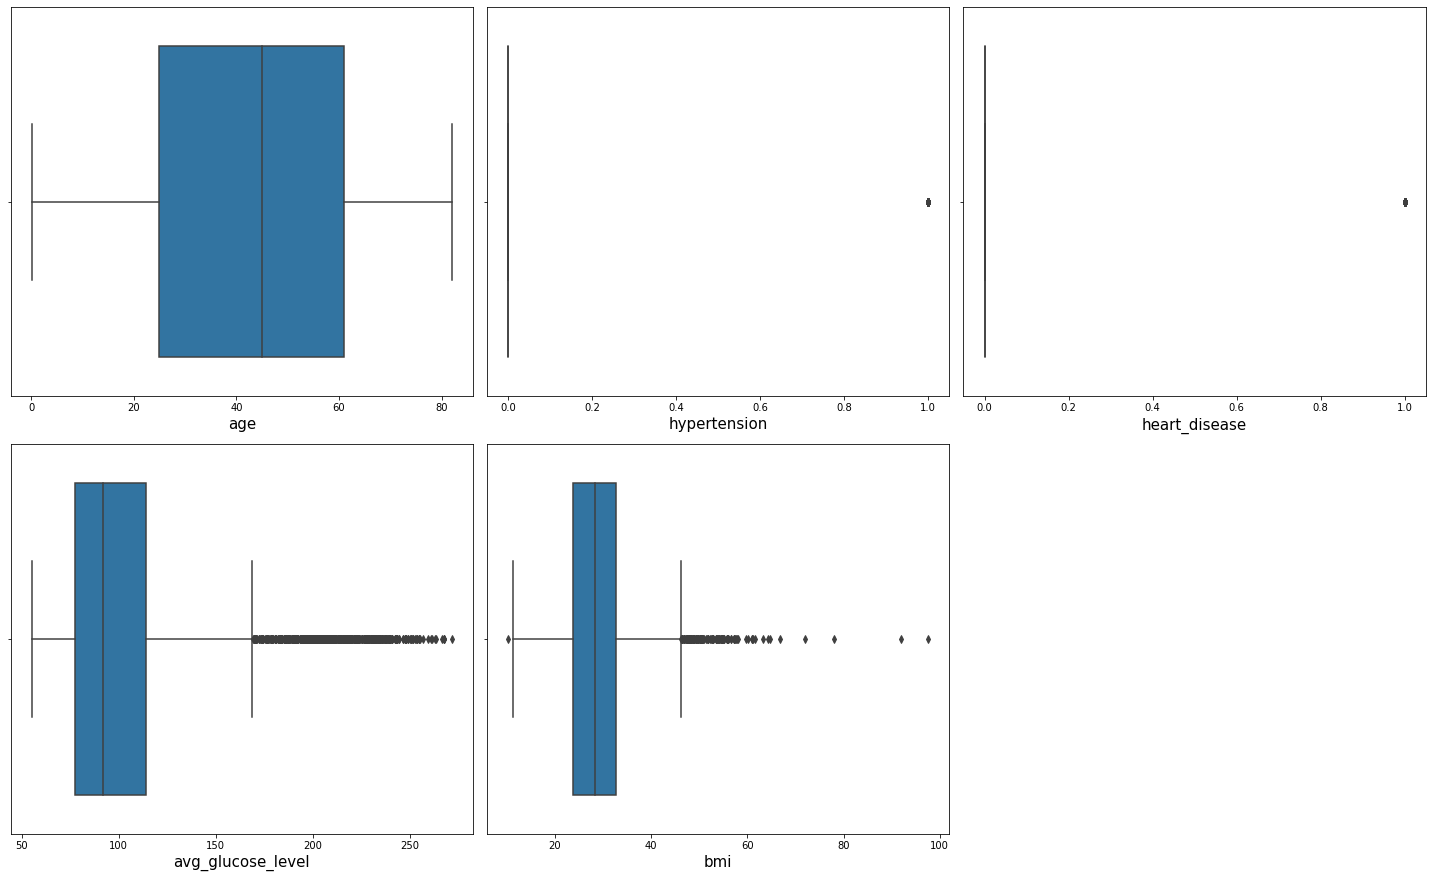

In [12]:
# boxplot
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in cols:
    if plotnumber <= len(cols):
        ax = plt.subplot(5, 3, plotnumber)
        sns.boxplot(cols[column])
        plt.xlabel(column, fontsize=15)
    plotnumber += 1
plt.tight_layout()    

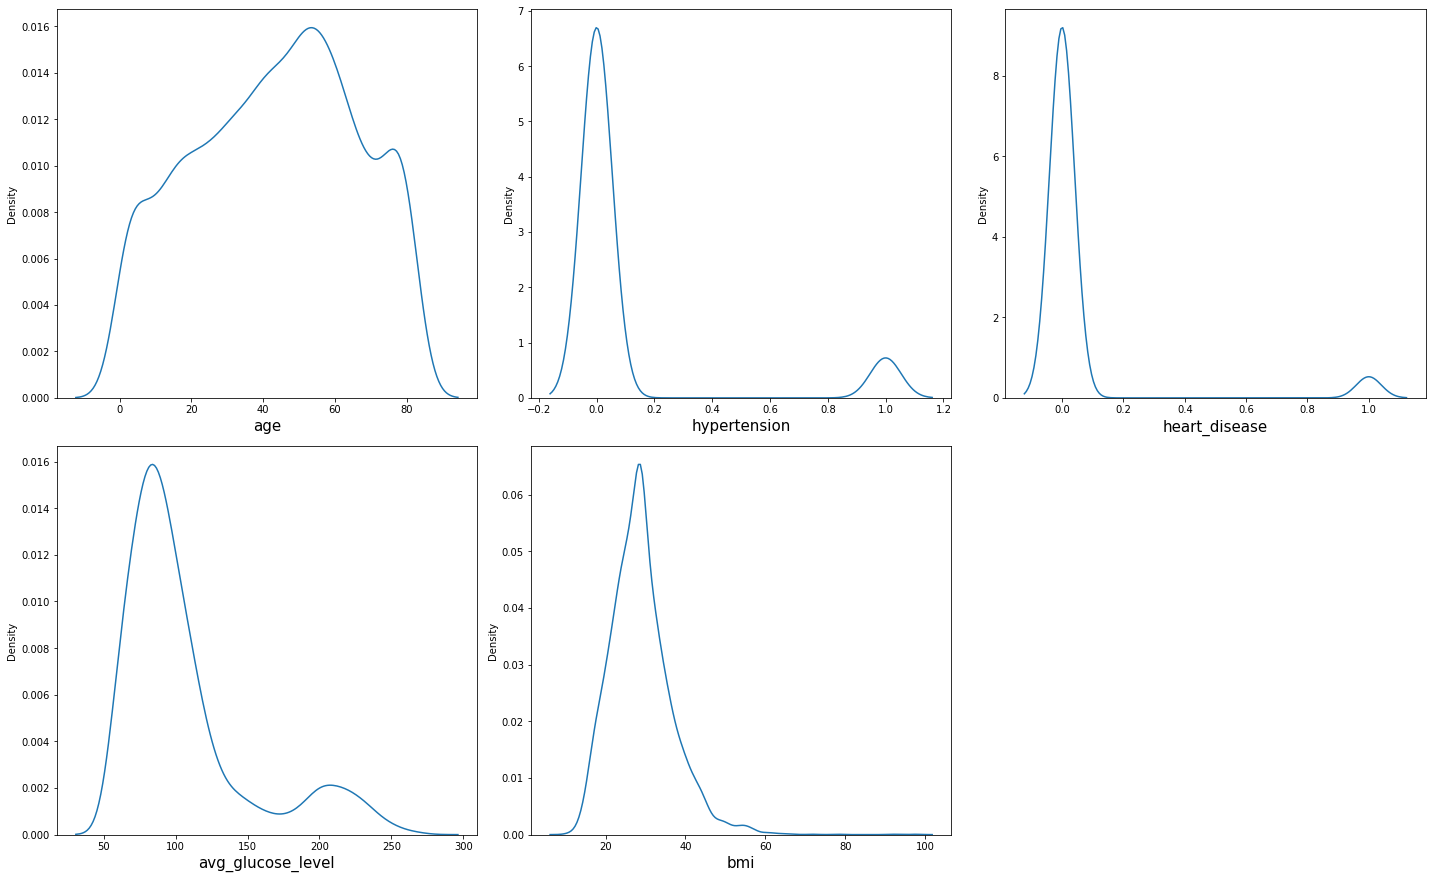

In [13]:
# kdeplot
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in cols:
    if plotnumber <= len(cols):
        ax = plt.subplot(5, 3, plotnumber)
        sns.kdeplot(cols[column])
        plt.xlabel(column, fontsize=15)

    plotnumber += 1
plt.tight_layout()        

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [15]:
# # encoding categorical data
# categorical_feature = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,5,6,7,10])], remainder='passthrough')
# # X = ct.fit_transform(dataset[col])
# X = np.array(ct.fit_transform(X))
# X

In [16]:
!pip install pandas_profiling==2.10


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.9/239.9 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 61.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 KB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=1315c430e63a2ef8a57f4119edcc0bb4d2dece2805594e6aad95b1cda3473d3a
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempting uninstall: pandas_profiling
    Found existing installation: pandas-profiling 

In [17]:
from pandas_profiling import ProfileReport
profile = ProfileReport(dataset)
profile.to_file(output_file = "stroke.html")


Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
from IPython.core.display import HTML
HTML(filename='stroke.html')


Number of variables,12
Number of observations,5110
Missing cells,0
Missing cells (%),0.0%
Duplicate rows,0
Duplicate rows (%),0.0%
Total size in memory,479.2 KiB
Average record size in memory,96.0 B
Numeric,4
Categorical,7
Boolean,1


# Encoding categorical features

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [20]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 5, 6, 7, 10])], remainder='passthrough')
# X = np.array(ct.fit_transform(X))

In [21]:
# pd.DataFrame(X)

In [22]:
# y

# Handling Categorical Features

In [23]:
dataset['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [24]:
dataset.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [25]:
gender = pd.get_dummies(dataset[['gender']], drop_first = True)
gender.head()

,gender_Male,gender_Other
0,1,0
1,0,0
2,1,0
3,0,0
4,0,0


In [26]:
married = pd.get_dummies(dataset[['ever_married']], drop_first=True)
married.head()

,ever_married_Yes
0,1
1,1
2,1
3,1
4,1


In [27]:
work = pd.get_dummies(dataset[['work_type']], drop_first=True)
work.head()

,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0


In [28]:
residence = pd.get_dummies(dataset[['Residence_type']], drop_first= True)
residence.head()

,Residence_type_Urban
0,1
1,0
2,0
3,1
4,0


In [29]:
smoking = pd.get_dummies(dataset[['smoking_status']], drop_first= True)
smoking.head()

,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


In [30]:
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status']

In [31]:
dataset = pd.concat([dataset, gender, married, work, residence, smoking], axis=1)
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,...,0,1,0,1,0,0,1,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,...,0,1,0,0,1,0,0,0,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,...,0,1,0,1,0,0,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,...,0,1,0,1,0,0,1,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,...,0,1,0,1,0,0,1,0,1,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,...,0,1,0,0,1,0,1,0,1,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,...,0,1,0,0,1,0,0,0,1,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,...,0,1,0,1,0,0,0,1,0,0


In [32]:
dataset = dataset.drop(columns=categorical_features, axis=1)
dataset

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.893237,0,0,0,1,0,1,0,0,1,0,1,0
5106,44873,81.0,0,0,125.20,40.000000,0,0,0,1,0,0,1,0,1,0,1,0
5107,19723,35.0,0,0,82.99,30.600000,0,0,0,1,0,0,1,0,0,0,1,0
5108,37544,51.0,0,0,166.29,25.600000,0,1,0,1,0,1,0,0,0,1,0,0


In [33]:
dataset = dataset.drop(columns="id" , axis=1)
dataset.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,0,1,0


In [34]:
dataset = dataset[dataset.columns[5:6].tolist() + dataset.columns[:5].tolist() + dataset.columns[6:].tolist()]

In [35]:
dataset

,stroke,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,228.69,36.600000,1,0,1,0,1,0,0,1,1,0,0
1,1,61.0,0,0,202.21,28.893237,0,0,1,0,0,1,0,0,0,1,0
2,1,80.0,0,1,105.92,32.500000,1,0,1,0,1,0,0,0,0,1,0
3,1,49.0,0,0,171.23,34.400000,0,0,1,0,1,0,0,1,0,0,1
4,1,79.0,1,0,174.12,24.000000,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,83.75,28.893237,0,0,1,0,1,0,0,1,0,1,0
5106,0,81.0,0,0,125.20,40.000000,0,0,1,0,0,1,0,1,0,1,0
5107,0,35.0,0,0,82.99,30.600000,0,0,1,0,0,1,0,0,0,1,0
5108,0,51.0,0,0,166.29,25.600000,1,0,1,0,1,0,0,0,1,0,0


In [36]:
dataset.isna().sum()

stroke                            0
age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
gender_Male                       0
gender_Other                      0
ever_married_Yes                  0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [37]:
dataset.columns

Index(['stroke', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

# Training and Splitting dataset

In [38]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

In [39]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [40]:
X

array([[67.,  0.,  1., ...,  1.,  0.,  0.],
       [61.,  0.,  0., ...,  0.,  1.,  0.],
       [80.,  0.,  1., ...,  0.,  1.,  0.],
       ...,
       [35.,  0.,  0., ...,  0.,  1.,  0.],
       [51.,  0.,  0., ...,  1.,  0.,  0.],
       [44.,  0.,  0., ...,  0.,  0.,  0.]])

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [44]:
y_pred_lr = lr.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score
lr_score = accuracy_score(y_test, y_pred_lr)
lr_score

0.9481409001956947

# K Nearest Neighbour

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
y_pred_knn = knn.predict(X_test)

In [48]:
knn_score = accuracy_score(y_test, y_pred_knn)
knn_score

0.9452054794520548

# Support vector machine

In [49]:
from sklearn.svm import SVC
sv = SVC(kernel='rbf', random_state=0)
sv.fit(X_train, y_train)

SVC(random_state=0)

In [50]:
y_pred_sv = sv.predict(X_test)

In [51]:
sv_score = accuracy_score(y_test, y_pred_sv)
sv_score

0.9471624266144814

# Naive Bayes

In [52]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [53]:
y_pred_nb = nb.predict(X_test)

In [54]:
nb_score = accuracy_score(y_test, y_pred_nb)
nb_score

0.19275929549902152

# Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [56]:
y_pred_dt = dt.predict(X_test)

In [57]:
dt_score = accuracy_score(y_test, y_pred_dt)
dt_score

0.9129158512720157

# Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [59]:
y_pred_rf = rf.predict(X_test)

In [60]:
rf_score = accuracy_score(y_test, y_pred_rf)
rf_score

0.9461839530332681

# Maximum Score

In [61]:
models = ['lr', 'knn', 'sv', 'nb', 'dt', 'rf']
scores = [lr_score, knn_score, sv_score, nb_score, dt_score, rf_score]
models_dict = {}
for i in range(len(models)):
    models_dict[f'{models[i]}_score'] = scores[i]
models_dict       

{'lr_score': 0.9481409001956947,
 'knn_score': 0.9452054794520548,
 'sv_score': 0.9471624266144814,
 'nb_score': 0.19275929549902152,
 'dt_score': 0.9129158512720157,
 'rf_score': 0.9461839530332681}

In [62]:
model_with_max_value = max(models_dict, key=models_dict.get)
print(model_with_max_value)

lr_score


In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       1.00      0.02      0.04        54

    accuracy                           0.95      1022
   macro avg       0.97      0.51      0.50      1022
weighted avg       0.95      0.95      0.92      1022



In [64]:
import pickle
with open('model_pickle.pkl','wb') as file:
    pickle.dump(lr,file)

In [65]:
import pickle
with open('model_pickle.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [66]:
with open('model_pickle.pkl','rb') as file:
    print(file.read())


b'\x80\x04\x95:\x03\x00\x00\x00\x00\x00\x00\x8c\x1esklearn.linear_model._logistic\x94\x8c\x12LogisticRegression\x94\x93\x94)\x81\x94}\x94(\x8c\x07penalty\x94\x8c\x02l2\x94\x8c\x04dual\x94\x89\x8c\x03tol\x94G?\x1a6\xe2\xeb\x1cC-\x8c\x01C\x94G?\xf0\x00\x00\x00\x00\x00\x00\x8c\rfit_intercept\x94\x88\x8c\x11intercept_scaling\x94K\x01\x8c\x0cclass_weight\x94N\x8c\x0crandom_state\x94K\x00\x8c\x06solver\x94\x8c\x05lbfgs\x94\x8c\x08max_iter\x94Kd\x8c\x0bmulti_class\x94\x8c\x04auto\x94\x8c\x07verbose\x94K\x00\x8c\nwarm_start\x94\x89\x8c\x06n_jobs\x94N\x8c\x08l1_ratio\x94N\x8c\x0en_features_in_\x94K\x10\x8c\x08classes_\x94\x8c\x15numpy.core.multiarray\x94\x8c\x0c_reconstruct\x94\x93\x94\x8c\x05numpy\x94\x8c\x07ndarray\x94\x93\x94K\x00\x85\x94C\x01b\x94\x87\x94R\x94(K\x01K\x02\x85\x94h\x1c\x8c\x05dtype\x94\x93\x94\x8c\x02i8\x94\x89\x88\x87\x94R\x94(K\x03\x8c\x01<\x94NNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00t\x94b\x89C\x10\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x94t\x94b\